<a href="https://colab.research.google.com/github/evsanekaplan/Proje_2/blob/main/Proje2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("NetflixOriginals.csv",encoding = "ISO-8859-1")

In [ ]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


# 1. Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


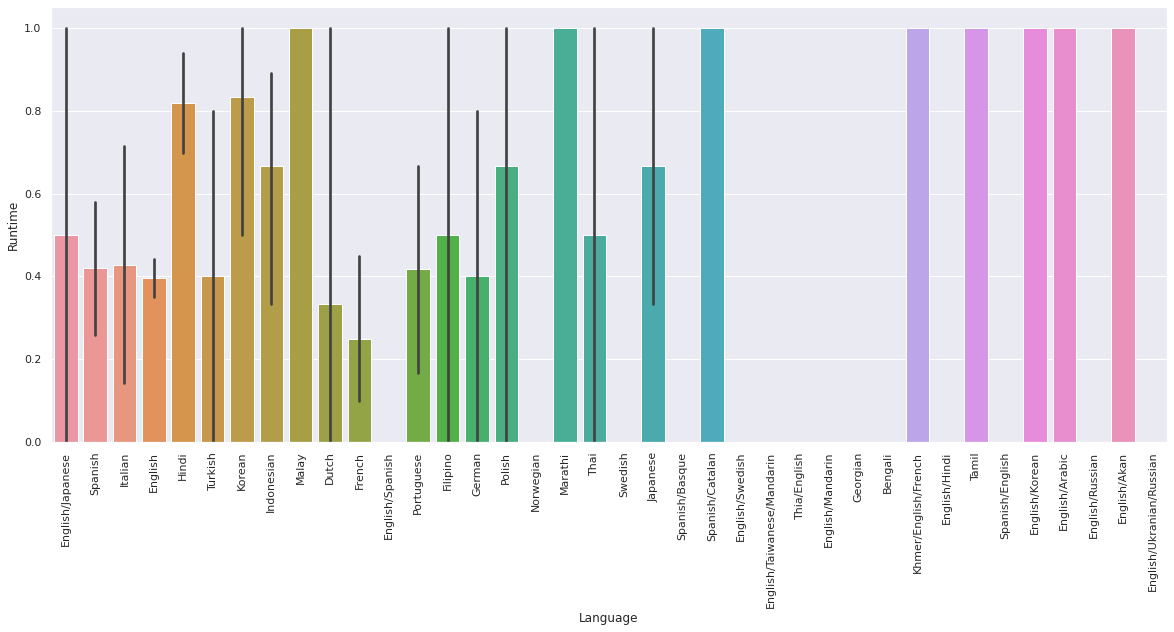

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
plot_1 = sns.barplot(df["Language"], df["Runtime"]>=100)
plot_1.tick_params(axis='x',rotation=90)

# 2. İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [ ]:
english_score = df[df["Language"]=="English"].sort_values(by="IMDB Score", ascending=False)
df_2 = english_score.head(1)
df_2["Genre"]

583    Documentary
Name: Genre, dtype: object

# 3. 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [ ]:
lang_hindi = df[df["Language"]=="Hindi"]
hindi_runtime = lang_hindi["Runtime"].mean()
hindi_runtime

115.78787878787878

# 4. "Genre" Sütunu kaç kategoriye sahiptir?

In [ ]:
len_of_genres = len(df["Genre"].value_counts())
print(len_of_genres)

115


# 5. "Genre" Sütunundaki kategoriler nelerdir?

In [28]:
unique_genres = df.loc[:,"Genre"].unique() 
print(unique_genres)

['Documentary' 'Thriller' 'Science fiction/Drama' 'Horror thriller'
 'Mystery' 'Action' 'Comedy' 'Heist film/Thriller'
 'Musical/Western/Fantasy' 'Drama' 'Romantic comedy' 'Action comedy'
 'Horror anthology' 'Political thriller' 'Superhero-Comedy' 'Horror'
 'Romance drama' 'Anime / Short' 'Superhero' 'Heist' 'Western'
 'Animation/Superhero' 'Family film' 'Action-thriller' 'Teen comedy-drama'
 'Romantic drama' 'Animation' 'Aftershow / Interview' 'Christmas musical'
 'Science fiction adventure' 'Science fiction' 'Variety show'
 'Comedy-drama' 'Comedy/Fantasy/Family' 'Supernatural drama'
 'Action/Comedy' 'Action/Science fiction' 'Romantic teenage drama'
 'Comedy / Musical' 'Musical' 'Science fiction/Mystery' 'Crime drama'
 'Psychological thriller drama' 'Adventure/Comedy' 'Black comedy'
 'Romance' 'Horror comedy' 'Christian musical' 'Romantic teen drama'
 'Family' 'Dark comedy' 'Comedy horror' 'Psychological thriller' 'Biopic'
 'Science fiction/Thriller' 'Mockumentary' 'Satire' 'One-man s

# 6. Veri setinde bulunan filmlerde en çok kullanılan 3 dil nedir?

In [ ]:
order_of_lang = df["Language"].value_counts()
order_of_lang.head(3)

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

# 7. IMDB puanı en yüksek olan ilk 10 film hangileridir?

In [ ]:
imdb_scores = df.sort_values(by="IMDB Score",ascending=False)
top_10 = imdb_scores.head(10)
movie_titles = top_10["Title"]
movie_titles

583       David Attenborough: A Life on Our Planet
582      Emicida: AmarElo - It's All For Yesterday
581                        Springsteen on Broadway
580    Winter on Fire: Ukraine's Fight for Freedom
579          Taylor Swift: Reputation Stadium Tour
578     Ben Platt: Live from Radio City Music Hall
577                         Dancing with the Birds
576                        Cuba and the Cameraman 
573                                          Klaus
571                                           13th
Name: Title, dtype: object

# 8. IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? Görselleştiriniz.

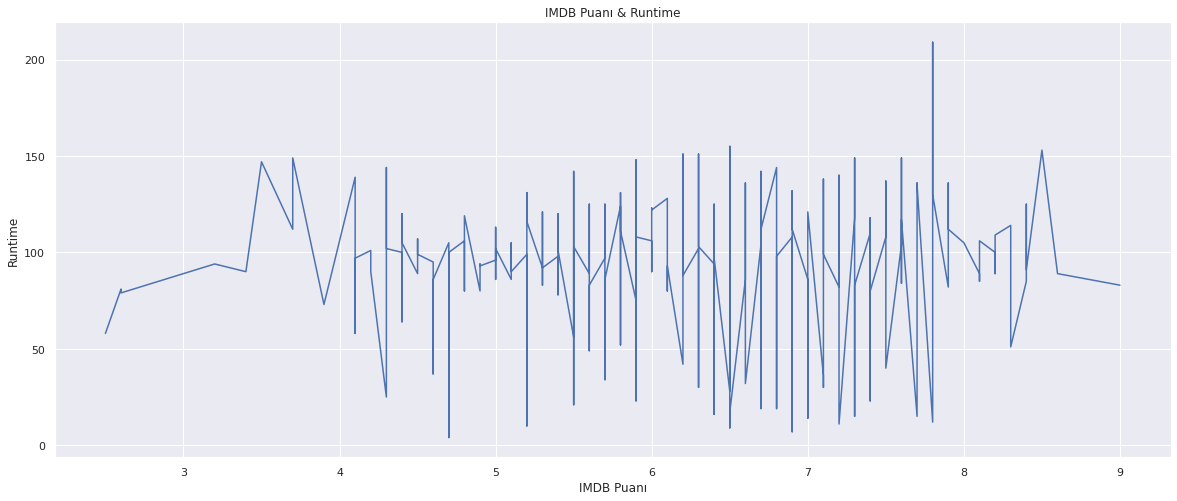

In [ ]:
plt.plot(df["IMDB Score"],df["Runtime"])
plt.rcParams["figure.figsize"] = (20,8)
plt.title("IMDB Puanı & Runtime")
plt.xlabel("IMDB Puanı")
plt.ylabel("Runtime")
plt.show()

# 9. IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

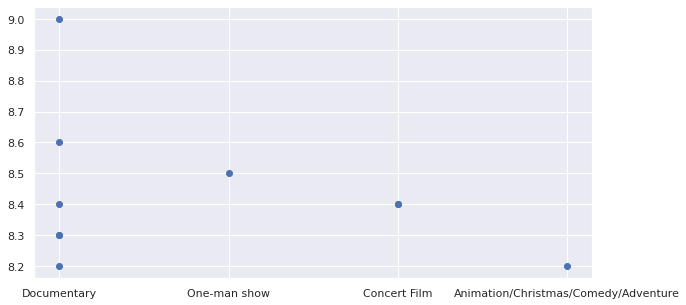

In [ ]:
imdb_scores = df.sort_values(by="IMDB Score",ascending=False)

top_10_imdb = imdb_scores["IMDB Score"].head(10)
genres = imdb_scores.loc[:,"Genre"].head(10)

plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(genres, top_10_imdb)
plt.show()

# 10. 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

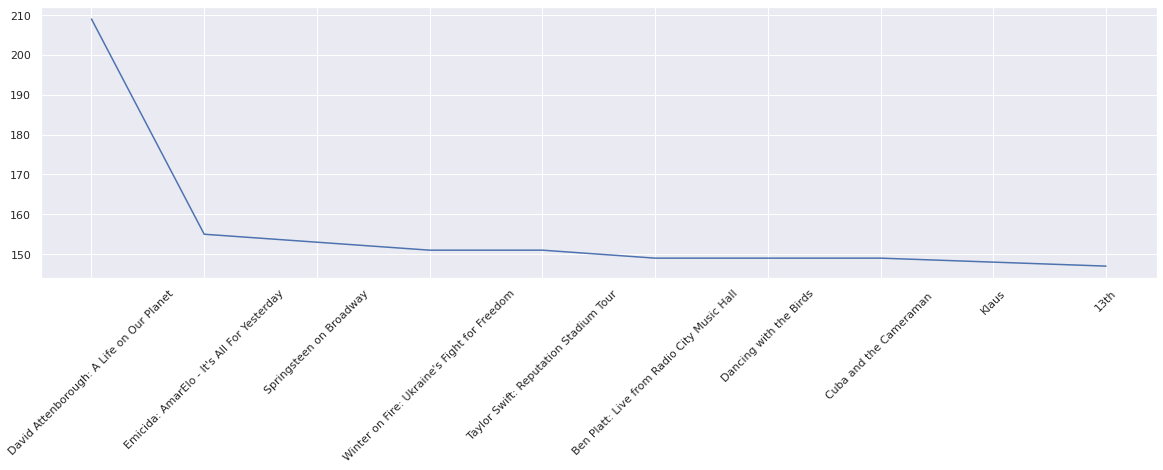

In [ ]:
runtimes = df.sort_values(by="Runtime",ascending=False).head(10)

top_10_runtime = runtimes["Runtime"].head(10)
titles = imdb_scores.loc[:,"Title"].head(10)

plt.rcParams["figure.figsize"] = (20,5)
plt.plot(titles , top_10_runtime)
plt.xticks(rotation = 45)
plt.show()

# 11. Hangi yılda en fazla film yayınlanmıştır? Görselleştiriniz.

In [ ]:
movie_count = df["Premiere"].value_counts()
movie_count.head(1)

October 2, 2020    6
Name: Premiere, dtype: int64

# 12. Yıllara göre yayınlanan film sayıları nelerdir? Görselleştiriniz.

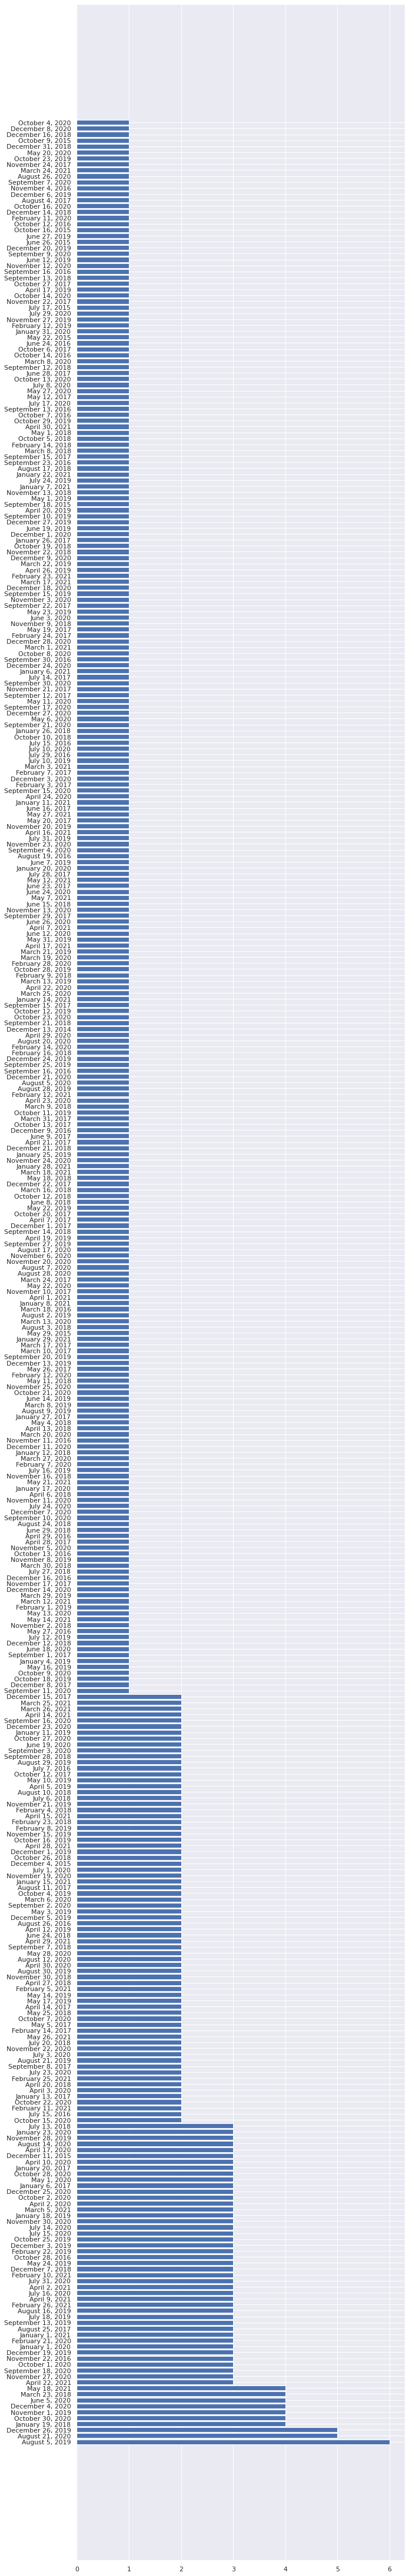

In [ ]:
plt.rcParams["figure.figsize"] = (10,80)
plt.barh(df["Premiere"].unique(),movie_count)
plt.show()

# 13. Hangi dilde yayınlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

In [ ]:
imdb_scores = df.sort_values(by="IMDB Score")

last_50_imdb = imdb_scores["IMDB Score"].head(50)
languages = imdb_scores.loc[:,"Language"].head(50)

#En düşük 50 IMDB puanına sahip olan dillerin sayı dağılımları.
intensity = languages.value_counts()
intensity

English             22
Hindi                6
Italian              4
French               4
Spanish              2
Korean               2
English/Japanese     1
Turkish              1
Indonesian           1
Malay                1
Dutch                1
Portuguese           1
English/Spanish      1
Filipino             1
German               1
Polish               1
Name: Language, dtype: int64

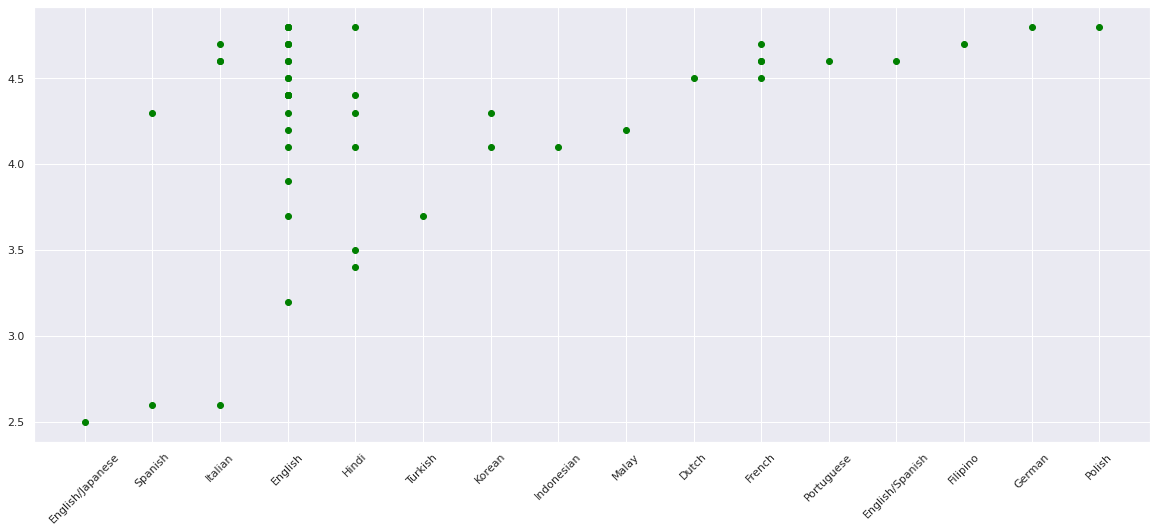

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
plt.scatter(languages , last_50_imdb, color="green")
plt.xticks(rotation = 45)
plt.show()

# 14. Hangi yılın toplam "runtime" süresi en fazladır?

In [ ]:
year_group = df.groupby("Premiere").sum()
runtime = year_group.loc[:,"Runtime"].sort_values(ascending=False)
runtime.head(1)

Premiere
October 2, 2020    600
Name: Runtime, dtype: int64

# 15. Her bir dilin en fazla kullandığı "Genre" nedir?

In [27]:
genre_lang = df.loc[:,["Language","Genre"]]
unique_genres = genre_lang["Genre"].unique()

for genre in unique_genres:
  genre_index = df[df["Genre"]==genre]
  lang_count = genre_index["Language"].value_counts()
  top_lang = lang_count.head(1)
  print(f"{genre} : {top_lang}")

Documentary : English    120
Name: Language, dtype: int64
Thriller : English    14
Name: Language, dtype: int64
Science fiction/Drama : English    2
Name: Language, dtype: int64
Horror thriller : English    3
Name: Language, dtype: int64
Mystery : Hindi    1
Name: Language, dtype: int64
Action : English    4
Name: Language, dtype: int64
Comedy : English    30
Name: Language, dtype: int64
Heist film/Thriller : English    1
Name: Language, dtype: int64
Musical/Western/Fantasy : English    1
Name: Language, dtype: int64
Drama : English    35
Name: Language, dtype: int64
Romantic comedy : English    27
Name: Language, dtype: int64
Action comedy : English    4
Name: Language, dtype: int64
Horror anthology : Hindi    1
Name: Language, dtype: int64
Political thriller : English    1
Name: Language, dtype: int64
Superhero-Comedy : English    1
Name: Language, dtype: int64
Horror : English    5
Name: Language, dtype: int64
Romance drama : French    1
Name: Language, dtype: int64
Anime / Short : 

In [ ]:
genre_lang = df.loc[:,["Language","Genre"]]
unique_langs = genre_lang["Language"].unique()

for language in unique_langs:
  lang_index = df[df["Language"]==language]
  genre_count = lang_index["Genre"].value_counts()
  top_genre = genre_count.head(1)
  print(f"{language} : {top_genre}")

English/Japanese : Documentary    1
Name: Genre, dtype: int64
Spanish : Documentary    8
Name: Genre, dtype: int64
Italian : Drama    4
Name: Genre, dtype: int64
English : Documentary    120
Name: Genre, dtype: int64
Hindi : Drama    13
Name: Genre, dtype: int64
Turkish : Comedy    2
Name: Genre, dtype: int64
Korean : Drama    2
Name: Genre, dtype: int64
Indonesian : Drama    3
Name: Genre, dtype: int64
Malay : Action comedy    1
Name: Genre, dtype: int64
Dutch : Romantic comedy    1
Name: Genre, dtype: int64
French : Documentary    6
Name: Genre, dtype: int64
English/Spanish : Documentary    5
Name: Genre, dtype: int64
Portuguese : Comedy    6
Name: Genre, dtype: int64
Filipino : Drama    1
Name: Genre, dtype: int64
German : Thriller    1
Name: Genre, dtype: int64
Polish : Horror    1
Name: Genre, dtype: int64
Norwegian : Horror    1
Name: Genre, dtype: int64
Marathi : Drama    2
Name: Genre, dtype: int64
Thai : Horror    1
Name: Genre, dtype: int64
Swedish : Thriller    1
Name: Genre

# 16. 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

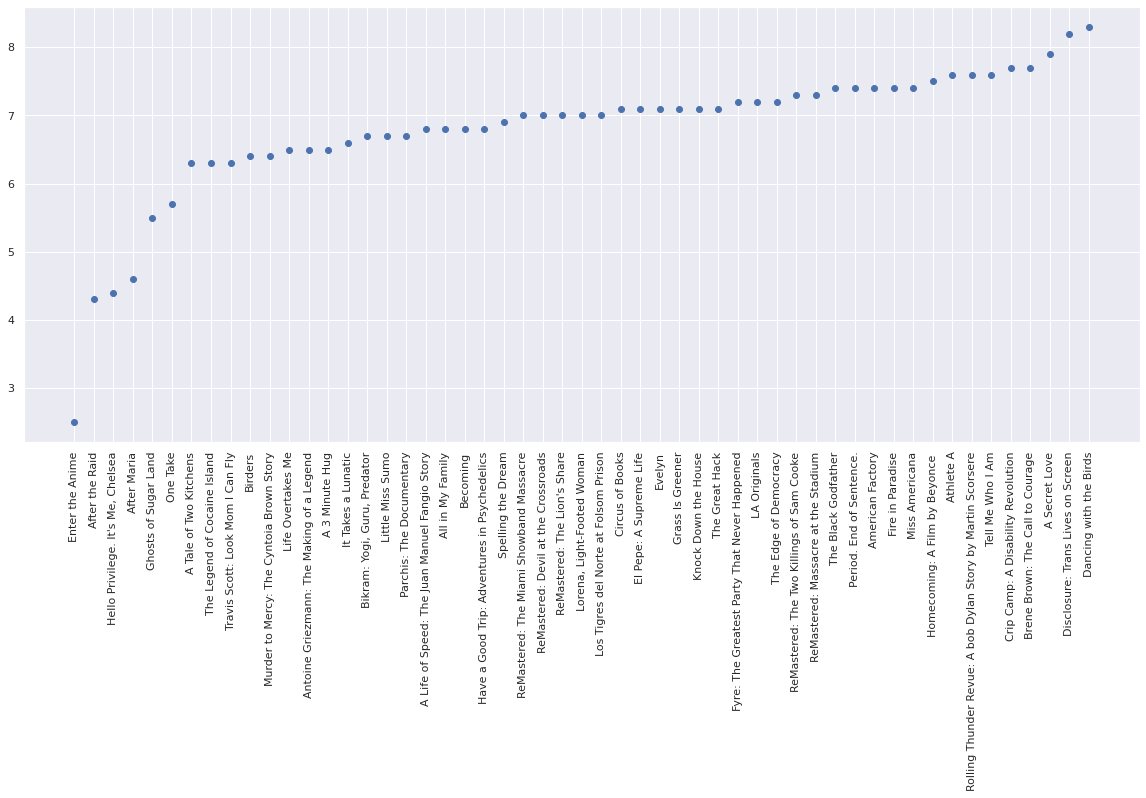

In [ ]:
import datetime
df["Premiere"] = pd.to_datetime(df["Premiere"]) #YYYY-MM-DD
start_date = datetime.datetime(2019, 1, 1)
end_date =  datetime.datetime(2020, 6, 30)

df_date = df[(df['Premiere'] > start_date) & (df['Premiere'] < end_date)]


doc_imdb = df_date[df_date["Genre"]=="Documentary"].sort_values(by="IMDB Score")


plt.scatter(doc_imdb["Title"], doc_imdb["IMDB Score"])
plt.xticks(rotation = 90)
plt.show()

# 17. Veri setinde outlier veri var mıdır?

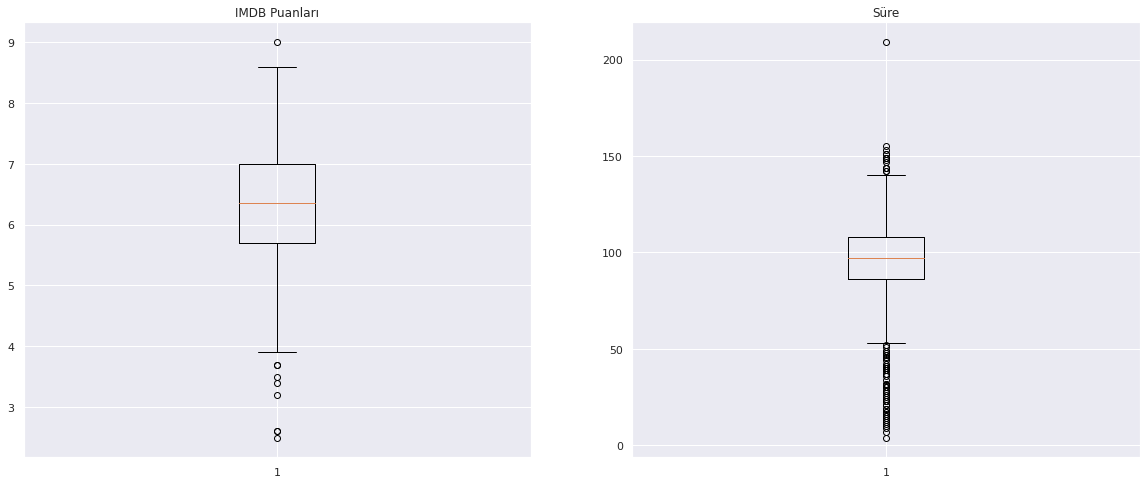

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
 
ax1.boxplot(df["IMDB Score"])
ax1.set_title("IMDB Puanları")
 
ax2.boxplot(df["Runtime"])
ax2.set_title("Süre")

plt.show()

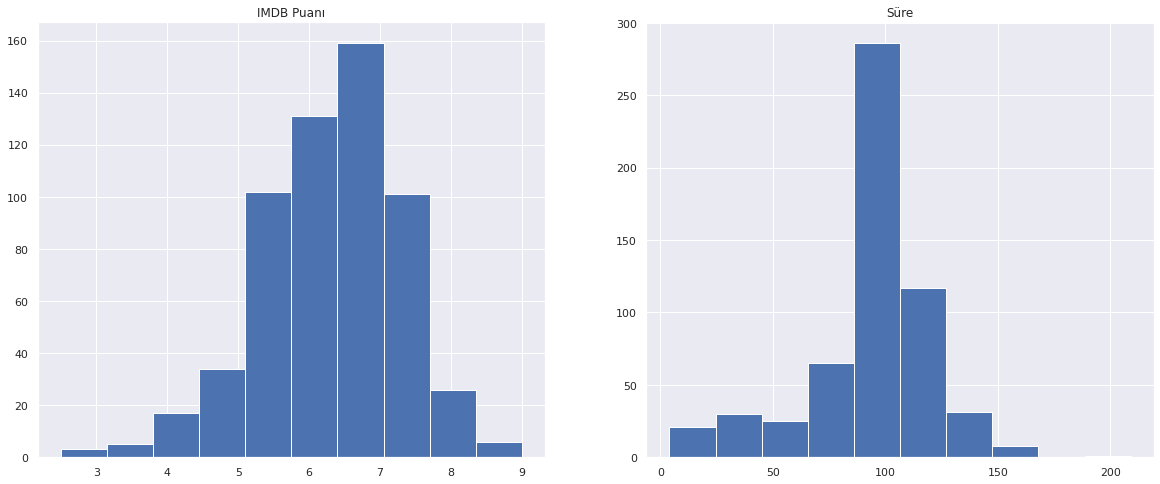

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
 
ax1.hist(df["IMDB Score"])
ax1.set_title("IMDB Puanı")
 
ax2.hist(df["Runtime"])
ax2.set_title("Süre")

plt.show()

Çeyrekler Açıklığı (IQR) ile aykırı değer sayılarının tespiti

In [ ]:
def iqr(df,var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_t = q1 - (1.5 * diff)
    upper_t = q3 + (1.5 * diff)
    return df[(df[var] < lower_t) | (df[var] > upper_t)]

puan = iqr(df, "IMDB Score")
sure = iqr(df, "Runtime")

print(len(puan), len(sure))

9 75


Z Skoru hesaplama

In [ ]:
df_zscore = (df["IMDB Score"] - df["IMDB Score"].mean())/df["IMDB Score"].std()
df_zscore

0     -3.851644
1     -3.749525
2     -3.749525
3     -3.136815
4     -2.932579
         ...   
579    2.173336
580    2.173336
581    2.275455
582    2.377573
583    2.786046
Name: IMDB Score, Length: 584, dtype: float64

Skew-Kurtosis Hesaplama

In [ ]:
df[["IMDB Score", "Runtime"]].agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
IMDB Score,-0.491363,0.671760
Runtime,-0.885430,1.771285
